In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
users = [
    { "id":0, "name":"Hero"},
    { "id":1, "name": "Dunn"},
    { "id":2, "name":"Sue"},
    { "id":3, "name":"Chi"},
    { "id":4, "name":"Thor"},
    { "id":5, "name":"Clive"},
    { "id":6, "name":"Hicks"},
    { "id":7, "name":"Devin"},
    { "id":8, "name":"Kate"},
    { "id":9, "name":"Klein"}
]

friendships = [ (0,1), (0,2), (1,2), (1,3), (2,3), (3,4),\
    (4,5), (5,6), (5,7), (6,8), (7,8), (8,9) ]

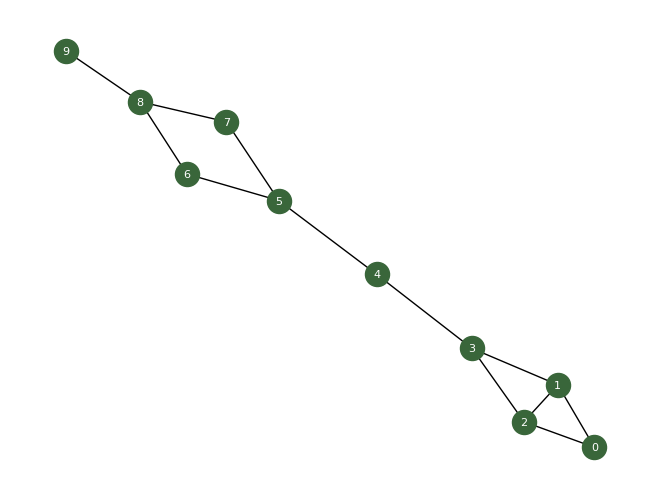

In [3]:
net = nx.Graph()
net.add_nodes_from( range(0,10) )
net.add_edges_from(friendships)
nx.draw( net, with_labels=True, node_color= [(0.223, 0.4, 0.227)], font_size = 8, font_color='white' )
plt.show()

In [4]:
# creating an empty list of users
for user in users:
    user["friends"] = []

# populating the users' list:
for i, j in friendships:
    # works because all provided users' id come from a linear range of 0-9
    users[i]["friends"].append( users[j] ) #adds "i" as friends with "j"
    users[j]["friends"].append( users[i])  #adds "j" as friends with "i"

In [5]:
def number_of_friends(user):
    """how many friends does this user has?"""
    return ( len(user["friends"]) ) # length of friends' id

In [9]:
total_connections = sum(number_of_friends(user) for user in users)
num_users = len(users) # length of the users list
avg_connections= total_connections/num_users

print("Total number of connections in DataSciencester: " + str(total_connections))
print("Average number of connections: " + str(avg_connections))

Total number of connections in DataSciencester: 24
Average number of connections: 2.4


In [16]:
# creating a list (user_id, number_of_friends) for each user in users list
num_of_friends_by_id = [ (user["id"], number_of_friends(user)) for user in users]
sorted( num_of_friends_by_id, key=lambda id_and_friends: id_and_friends[1], reverse=True )


[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [20]:
def foaf_ids_bad(user):
    """foaf is short for 'friend of a friend' """
    return[ foaf["id"] for friend in user["friends"]\
        for foaf in friend["friends"]]

foaf_ids_bad(users[0]) # Hero

[0, 2, 3, 0, 1, 3]

In [22]:
from collections import Counter

def not_the_Same( user, other_user):
    """ two users are not the same if they have different id's"""
    return user["id"] != other_user["id"]

def not_friends( user, other_user):
    """ other_user is not friends with user if its not in user's friendlist"""
    return all( not_the_Same(friend, other_user) for friend in user["friends"] )

def friends_of_friends_ids(user):
    return Counter( foaf["id"] for friend in user["friends"]\
        for foaf in friend["friends"] if not_the_Same(user, foaf) and not_friends(user,foaf))
    # for each one of my friends that count as "their" friends and that are not mine me or my friends


friends_of_friends_ids( users[3] )

Counter({0: 2, 5: 1})

In [23]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [33]:
# Finding users with the same interest:
def data_scientists_who_like(target_interest):
    return[ user_id for user_id, user_interest in interests \
        if user_interest == target_interest]

# works, but INEFFICIENTLY 
# its better to include an index for each user:

from collections import defaultdict
# the KEYS are the interets, the values are lists of user_ids with the interest in question

user_id_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_id_by_interest[interest].append(user_id)
    user_id_by_interest[user_id].append(interest)



In [34]:
salaries_and_tenures = [
(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)
]

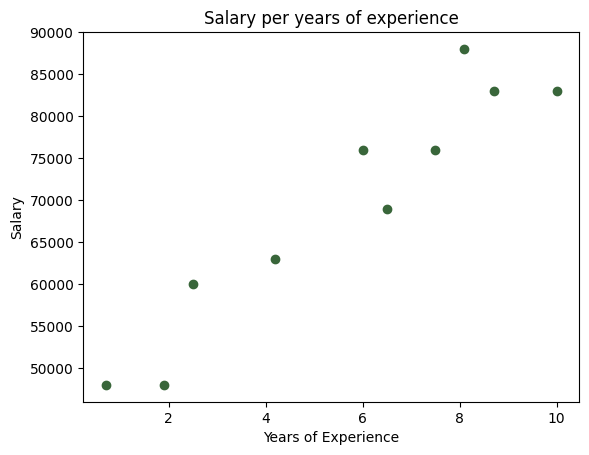

In [39]:
# making a scatter plot:
x_index_years = []
y_index_salaries = []

for index in salaries_and_tenures:
    x_index_years.append( index[1] )
    y_index_salaries.append( index[0] )


salaries_per_experience = plt.scatter( x=x_index_years, y=y_index_salaries, c=[(0.223, 0.4, 0.227)])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary per years of experience")
plt.show()

In [49]:
# Analyzing the average salary for each tenure
salary_by_tenure = defaultdict(list)
# the keys are years, the values are lists of salaries per tenure

for salary,tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

average_salary_by_tenure = {
    tenure: sum(salaries)/len(salaries) \
        for tenure,salaries in salary_by_tenure.items()
}

average_salary_by_tenure

# This turns out to be not particularly useful, as none of the users have the
# same tenure, which means we’re just reporting the individual users’ salaries:


{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [53]:
# Grouping results:

def tenure_bucket(tenure):
    if tenure < 2:
        return "less then two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

# Keys are tenure buckets, values are lists of salaries for that bucket

salary_by_tenure_bucket = defaultdict(list)
for salary,tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

average_salary_by_bucket = {
    tenure_bucket : sum(salaries)/len(salaries)\
        for tenure_bucket,salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less then two': 48000.0,
 'between two and five': 61500.0}

In [56]:
paid_accounts = [
    (0.7, 'paid'), (1.9, 'unpaid'), (2.5, 'paid'),
    (4.2, 'unpaid'),(6.0, 'unpaid'),(6.5,'unpaid'),
    (7.5, 'unpaid'),(8.1, 'unpaid'),(8.7, 'paid'),(10.0, 'paid')
]

In [57]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"


In [63]:
words_and_counts = Counter(word
for user, interest in interests
for word in interest.lower().split())

for word,count in words_and_counts.most_common():
    if count > 1:
        print( word, count)


big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
